In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from tsGen.temporal import *
from tsGen.samplers import *
from tsGen.catsamplers import *
from tsGen.factory import Factory
import unittest
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
import math
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [3]:
recipe_1 = { 
            'start': '2018-01-01',
            'end': '2018-01-02',
            'delta': '1 h'
         }
ts = TemporalTemplate(recipe_1)

In [4]:
np.random.seed(seed=42)
mu = 1.6
pdf = poisson(mu)
pois =  PDFSampler(pdf)
f2 = Factory(ts,pois)
series = f2.create()
series2 = f2.create()
series3 = f2.create()

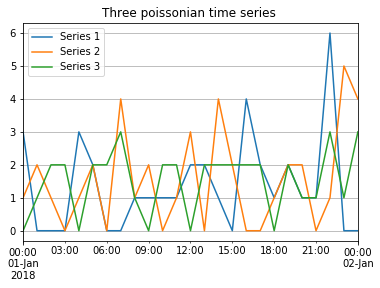

In [5]:
series.plot(label='Series 1')
series2.plot(label='Series 2')
series3.plot(label='Series 3')
plt.title('Three poissonian time series ')
plt.grid()
plt.legend()
plt.show()

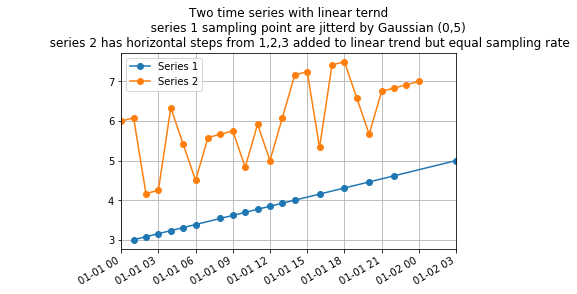

In [6]:
np.random.seed(seed=42)
steps = StepSampler([1,2,3])
func1 = FunctionSampler(func=lambda idx,x,tick: 2*x+3)
pdf =norm(0,5)  
ts2 = ts + TemporalJitter(pdf,resolution='h')
f3 = Factory(ts2,func1 )
f4 = Factory(ts,func1 +steps)
series = f3.create()
series2 = f4.create()
series.plot( style='-o',label='Series 1')
series2.plot(style='-o',label='Series 2')
plt.title('Two time series with linear ternd\n \
          series 1 sampling point are jitterd by Gaussian (0,5) \n \
          series 2 has horizontal steps from 1,2,3 added to linear trend but equal sampling rate')
plt.grid()
plt.legend()
plt.show()

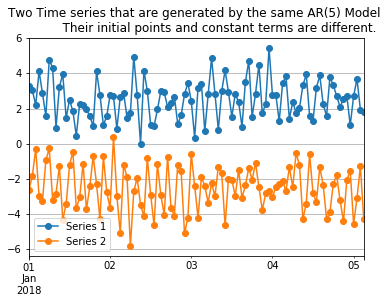

In [7]:
np.random.seed(seed=42)
AR_5_1 = AutoRegSampler(coeffs=[0.10,0.05,0.5,-0.5,0.1],init=[1,2,3,2,1],noise=1.00,const=2.0)
AR_5_2 = AutoRegSampler(coeffs=[0.10,0.05,0.5,-0.5,0.1],init=[1,2,3,2,1],noise=1.00,const=-2.0)
ts2 = TemporalTemplate(dict(start='2018-01-01',length=100,delta='1 h'))
f5_1 = Factory(ts2,AR_5_1)
f5_2 = Factory(ts2,AR_5_2)
series = f5_1.create()
series2 = f5_2.create()
series.plot( style='-o',label='Series 1')
series2.plot( style='-o',label='Series 2')
plt.title('Two Time series that are generated by the same AR(5) Model \n \
           Their initial points and constant terms are different.')
plt.grid()
plt.legend()
plt.show()

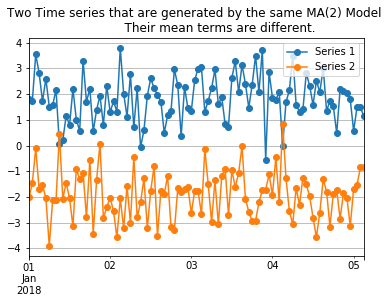

In [8]:
np.random.seed(seed=42)
MA_2_1 = MovingAvgSampler(coeffs=[0.10,0.05],noise=1.00,mean=2.0)
MA_2_2 = MovingAvgSampler(coeffs=[0.10,0.05],noise=1.00,mean=-2.0)
ts3 = TemporalTemplate(dict(start='2018-01-01',length=100,delta='1 h'))
f6_1 = Factory(ts3,MA_2_1)
f6_2 = Factory(ts3,MA_2_2)
series = f6_1.create()
series2 = f6_2.create()
series.plot( style='-o',label='Series 1')
series2.plot( style='-o',label='Series 2')
plt.title('Two Time series that are generated by the same MA(2) Model \n \
           Their mean terms are different.')
plt.grid()
plt.legend()
plt.show()

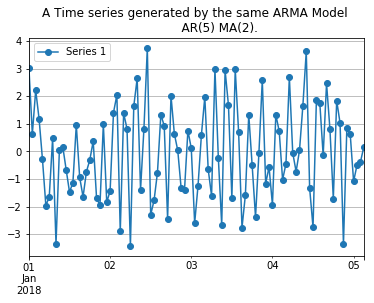

In [9]:
np.random.seed(seed=42)
MA_2_3 = MovingAvgSampler(coeffs=[0.10,0.05],noise=1.00,mean=0.0)
AR_5_3 = AutoRegSampler(coeffs=[0.10,0.05,0.5,-0.5,0.1],init=[1,2,3,2,1],noise=1.00,const=0.0)
ts4 = TemporalTemplate(dict(start='2018-01-01',length=100,delta='1 h'))
f7_1 = Factory(ts4,MA_2_3 + AR_5_3)
series = f7_1.create()
series.plot( style='-o',label='Series 1')

plt.title('A Time series generated by the same ARMA Model \n \
           AR(5) MA(2).')
plt.grid()
plt.legend()
plt.show()

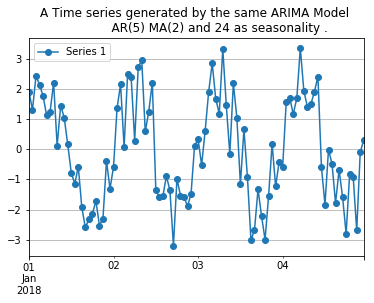

In [10]:
np.random.seed(seed=42)
MA_2_4 = MovingAvgSampler(coeffs=[0.10,0.05],noise=0.50,mean=0.0)
AR_5_4 = AutoRegSampler(coeffs=[0.10,0.05,0.5,-0.5,0.1],init=[1,2,3,2,1],noise=0.50,const=0.0)
sin_sampler = FunctionSampler(func=lambda idx,x,tick: 2*math.sin(4*2*math.pi*x))
ts5 = TemporalTemplate(dict(start='2018-01-01',length=24*4,delta='1 h'))
f8_1 = Factory(ts5,MA_2_4 + AR_5_4 + sin_sampler)
series = f8_1.create()
series.plot( style='-o',label='Series 1')

plt.title('A Time series generated by the same ARIMA Model \n \
           AR(5) MA(2) and 24 as seasonality .')
plt.grid()
plt.legend()
plt.show()

In [4]:

fft1 = InvFFTSampler(spectrum=[1.,1.,1.,1.])
ts5 = TemporalTemplate(dict(start='2018-01-01',length=8,delta='1 h'))
f9_1 = Factory(ts5,fft1)
series = f9_1.create()
series.plot( style='-o',label='Series 1')

plt.title('FFT.')
plt.grid()
plt.legend()
plt.show()

[ 1.  1.  1.  1.  0.  0.  0.  0.]
[ 0.500+0.j         0.125+0.3017767j  0.000+0.j         0.125+0.0517767j
  0.000+0.j       ]


IndexError: index 5 is out of bounds for axis 0 with size 5

In [5]:
series

NameError: name 'series' is not defined

In [24]:
from numpy.fft import ifft,fft
s = [1.,1.,1.,1.0]#[1. ,2., 1.,2.0, 1.,2.0, 1.,2.0]#[2. for i in range(64)]
ifft(s)

array([ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])

In [142]:
a = [1.,0,0,0,0]
b=ifft(a)

In [143]:
b

array([ 0.2+0.j,  0.2+0.j,  0.2+0.j,  0.2+0.j,  0.2+0.j])

In [27]:
c = ifft(b)

In [28]:
c

array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j])

In [74]:
a = [0.0,1,1,0,0,0,0]
b = fft(a)

In [67]:
b_1 = b[1:4]
b_2 = b[4:]
b_2 = b_2[::-1]
b_3 = (b_1 + b_2)/2.

In [42]:
ifft([ 2.00000000+0.j        ,  0.40096887-0.0j,
       -1.12348980-0.54104417j, -0.27747907+0.34794774j,
       -0.27747907-0.34794774j, -1.12348980+0.54104417j,
        0.40096887+1.0j])

array([  1.58603289e-17+0.j,   8.30954767e-01+0.j,   7.89204039e-01+0.j,
        -9.38130257e-02+0.j,   9.38130258e-02+0.j,   2.10795958e-01+0.j,
         1.69045236e-01+0.j])

In [47]:
b[3:]

array([-0.27747907+0.34794774j, -0.27747907-0.34794774j,
       -1.12348980+0.54104417j,  0.40096887+1.75675939j])

In [55]:
b_1

array([ 0.40096887-1.75675939j, -1.12348980-0.54104417j,
       -0.27747907+0.34794774j])

In [69]:
ifft(b_3)

array([-0.33333333+0.j        ,  0.36715110-0.24422226j,
        0.36715110+0.24422226j])

In [81]:
ifft([np.abs(i) for i in b])

array([ 1.28398834+0.j,  0.41286911+0.j, -0.07056560+0.j,  0.01570232+0.j,
        0.01570232+0.j, -0.07056560+0.j,  0.41286911+0.j])

In [76]:
b

array([ 2.00000000+0.j        ,  0.40096887-1.75675939j,
       -1.12348980-0.54104417j, -0.27747907+0.34794774j,
       -0.27747907-0.34794774j, -1.12348980+0.54104417j,
        0.40096887+1.75675939j])

In [160]:
def f(spec):
    x = np.linspace(0,2*math.pi,num=100)
    data = np.zeros(len(x))
    spec2 = np.array(spec,dtype=np.complex128)
    spec2 = np.concatenate((spec2, [np.conjugate(i) for i in spec2[::-1]]))
    s2 = ifft(spec2)#*len(spec)
    print(s2)
    for c in s2[1:len(spec2)/2]:
        A = np.abs(c)
        phi = np.angle(c)
        print(A,phi)
        data += data + A*np.cos(2*math.pi*x)
    plt.plot(x,data,'-o')
    plt.grid()
    plt.show()

[ 0.750+0.j     0.125-0.125j  0.000+0.j     0.125+0.125j]
(0.17677669529663689, -0.78539816339744828)


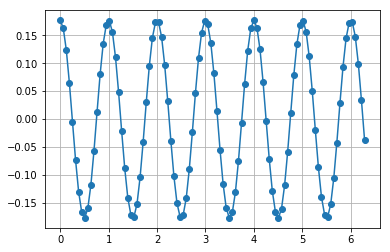

In [164]:
f([1.0,.5])

In [112]:
np.fft.fftfreq(6)

array([ 0.        ,  0.16666667,  0.33333333, -0.5       , -0.33333333,
       -0.16666667])

In [144]:
np.array([1,2,3],dtype=np.complex128)

array([ 1.+0.j,  2.+0.j,  3.+0.j])